In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\smexy\\Documents\\ML_Projects\\archive\\labeled_data.csv')

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
import re
def text_clean(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

In [5]:
clean_df = text_clean(df, "tweet")

In [6]:
clean_df = clean_df.drop('Unnamed: 0', axis = 1)
clean_df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,rt as a woman you shouldnt complain about cl...
1,3,0,3,0,1,rt boy dats coldtyga dwn bad for cuffin dat ...
2,3,0,3,0,1,rt dawg rt you ever fuck a bitch and she st...
3,3,0,2,1,1,rt ganderson based she look like a tranny
4,6,0,6,0,1,rt the shit you hear about me might be true ...
...,...,...,...,...,...,...
24778,3,0,2,1,1,yous a muthafin lie 8220 pearls emanuel right ...
24779,3,0,1,2,2,youve gone and broke the wrong heart baby and ...
24780,3,0,3,0,1,young buck wanna eat dat nigguh like i aint fu...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [23]:
clean_df['offensive_language'].value_counts(normalize = True)

3    0.540007
2    0.171327
0    0.140217
1    0.083364
6    0.034580
5    0.014889
4    0.010128
9    0.002663
8    0.001493
7    0.001332
Name: offensive_language, dtype: float64

Offensive language will be biased

In [24]:
clean_df['offensive_language'].mean()

2.413711011580519

Showing offensive language counts as a chart:

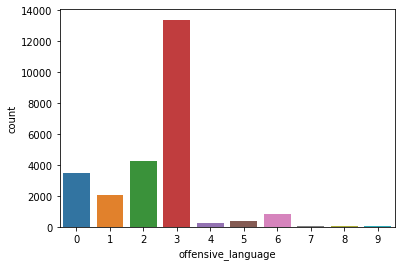

In [28]:
import seaborn as sns
sns.countplot(x="offensive_language", data=clean_df);

Pipeline layout/logic:

CountVectorizer - Turn text into matrix of token counts

TfidfTransformer - Turns CountVectorizer matrix into normalized TF representation

SGD Classfier - Implements linear models with stochastic gradient descent learning, as arrays of floating point values

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
SGD_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('nb', SGDClassifier())])

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
D:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

In [8]:
X = clean_df['tweet']
y = clean_df['hate_speech']

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
sgd = SGD_pipe.fit(X_train, y_train)

In [11]:
pred_y = sgd.predict(X_test)

In [12]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_y, average='weighted')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7335584716815651

Using same pipeline for example:

In [13]:
SGD_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('nb', SGDClassifier())])

In [14]:
X = clean_df['tweet']
y = clean_df['offensive_language']

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
sgd = SGD_pipe.fit(X_train, y_train)

In [17]:
pred_y = sgd.predict(X_test)

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_y, average='weighted')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5730930812020587